In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/Colab Notebooks/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification"
print("Base Dir Content:")
print(os.listdir(base_dir))

print("\nContents of train dir")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of test dir")
print(os.listdir(f'{base_dir}/test'))
print("\nContents of val dir")
print(os.listdir(f'{base_dir}/val'))

Base Dir Content:
['test', 'val', 'train']

Contents of train dir
['fractured', 'not fractured']

Contents of test dir
['fractured', 'not fractured']

Contents of val dir
['not fractured', 'fractured']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# dir with training set
train_fracture_dir = os.path.join(train_dir, 'fractured')
train_not_fracture_dir = os.path.join(train_dir, 'not fractured')
# dir with val set
val_fracture_dir = os.path.join(val_dir, 'fractured')
val_not_fracture_dir = os.path.join(val_dir, 'not fractured')
# dir with test set
test_fracture_dir = os.path.join(test_dir, 'fractured')
test_not_fracture_dir = os.path.join(test_dir, 'not fractured')

In [ ]:
# Check some file names
train_fracture_filename = os.listdir(train_fracture_dir)
print(train_fracture_filename[:5])

['92-rotated1-rotated1-rotated2 (1).jpg', '93-rotated3-rotated1-rotated2 - Copy (1).jpg', '91-rotated3-rotated3-rotated1.jpg', '92-rotated2-rotated3 - Copy.jpg', '92-rotated1-rotated2-rotated3 - Copy (1).jpg']


# Loading data

In [ ]:
train_data = []
train_labels = []
for class_name in os.listdir(train_dir):
  class_dir = os.path.join(train_dir, class_name)
  for image_name in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image_name)
    image = cv2.imread(image_path, 0)
    if (image is not None):
      image = cv2.resize(image, (150,150), interpolation=cv2.INTER_AREA)
      train_data.append(image.flatten())
      train_labels.append(class_name)
    else:
      print("Warning: Failed to load image at {}".format(image_path))

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
test_data = []
test_labels = []
for class_name in os.listdir(test_dir):
  class_dir = os.path.join(test_dir, class_name)
  for image_name in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image_name)
    image = cv2.imread(image_path, 0)
    if (image is not None):
      image = cv2.resize(image, (150,150), interpolation=cv2.INTER_AREA)
      # tes individu
      gamma = 0.6
      c = 255 / np.power(np.max(image), gamma)
      image = c * np.power(image, gamma)
      # ...
      test_data.append(image.flatten())
      test_labels.append(class_name)
    else:
      print("Warning: Failed to load image at {}".format(image_path))

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
# nggak dijalanin gapapa soalnya val_data masih blom kepake
# val_data = []
# val_labels = []
# for class_name in os.listdir(val_dir):
#   class_dir = os.path.join(val_dir, class_name)
#   for image_name in os.listdir(class_dir):
#     image_path = os.path.join(class_dir, image_name)
#     image = cv2.imread(image_path, 0)
#     if (image is not None):
#       image = cv2.resize(image, (150,150), interpolation=cv2.INTER_AREA)
#       val_data.append(image.flatten())
#       val_labels.append(class_name)
#     else:
#       print("Warning: Failed to load image at {}".format(image_path))

# val_data = np.array(val_data)
# val_labels = np.array(val_labels)

# Classification

In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(train_data, train_labels)

# validation data for hyperparameters tuning
# classifier.fit(train_data, train_labels, validation_data=(val_data, val_labels))

SVC(kernel='linear')

In [ ]:
# Predict the labels for the test set
y_pred = classifier.predict(test_data)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 1.0


svm kernel:
*   rbf (default) = 0.9466
*   linear = 1.0
- poly = 0.9822
- Sigmoid = 0.5158
- precomputed = error

Predicting image

Predicted Class: ['not fractured']


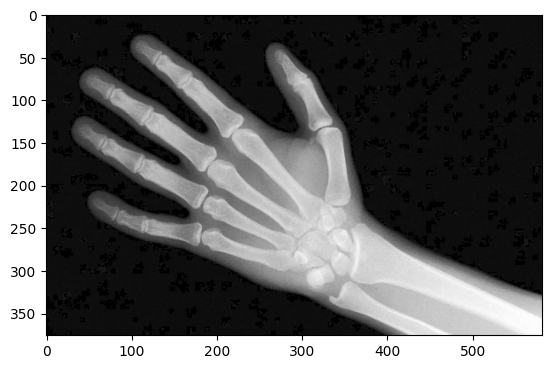

In [ ]:
# FRACTURED IMAGES
# image_path = "/content/drive/MyDrive/Colab Notebooks/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/0c70d9cb6ae7fcf9faae2dc812af08_gallery.jpg"
# image_path = "/content/drive/MyDrive/Colab Notebooks/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/0.png"

# NOT FRACTURED IMAGES
# image_path = "/content/drive/MyDrive/Colab Notebooks/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/0.png"
# image_path = "/content/drive/MyDrive/Colab Notebooks/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/1.png"

# ANOTHER ONE ~DJ KHALED
image_path = "bone.png"

image = cv2.imread(image_path, 0)
plt.imshow(image, cmap='gray')

image = cv2.resize(image, (150,150), interpolation=cv2.INTER_AREA)
image = image.flatten()

predicted_class = classifier.predict([image])
print("Predicted Class:", predicted_class)

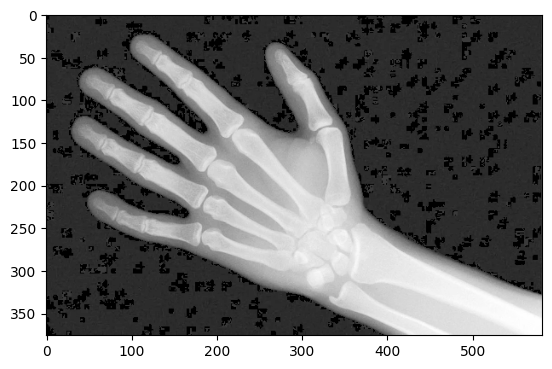

In [ ]:
image = cv2.imread('bone.png', 0)
gamma = 0.6
c = 255 / np.power(np.max(image), gamma)
img_law = c * np.power(image, gamma)

plt.imshow(img_law, cmap='gray')
plt.show()

# EVALUATION

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

K Fold Cross Validation

In [ ]:
# k = 5 #this number good for bigger dataset. Either this or 10 (for smaller datasete)
# kfold = StratifiedKFold(n_splits=k, shuffle=True)

# scores = cross_val_score(classifier, train_data, train_labels, cv=kfold, scoring='accuracy')
# print("score:", scores)

KeyboardInterrupt: 

Stratified Hold Out

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(train_data, train_labels, test_size=0.2, stratify=train_labels)

classifier.fit(xtrain, ytrain)

ypred = classifier.predict(xval)
print("accuracy:", accuracy_score(yval, ypred))
print("classification report:\n" + classification_report(yval, ypred))

accuracy: 0.9875742841707186
classification report:
               precision    recall  f1-score   support

    fractured       0.99      0.98      0.99       921
not fractured       0.98      0.99      0.99       930

     accuracy                           0.99      1851
    macro avg       0.99      0.99      0.99      1851
 weighted avg       0.99      0.99      0.99      1851



# EXPERIMENT

<ipython-input-11-06db2f97b822>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


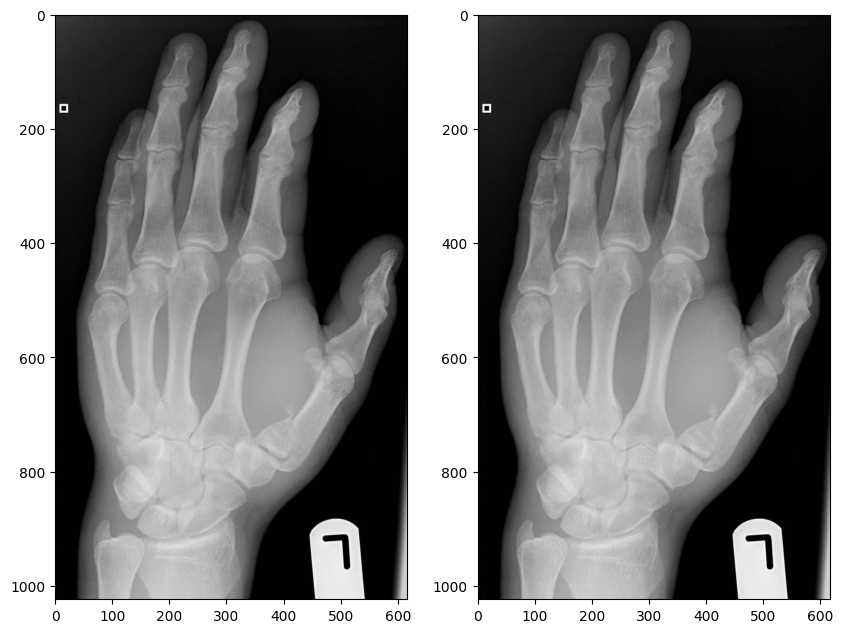

In [ ]:
# apple_0 = cv2.imread("0.jpg", 0)

# apple_1 = cv2.imread('0.jpg')
# apple_1 = cv2.cvtColor(apple_1, cv2.COLOR_BGR2HSV)
# h,s,v = cv2.split(apple_1)
# apple_gray = (0.7 * s + 0.3 * v)

# plt.subplots(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.imshow(apple_0, cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(apple_gray, cmap='gray')